# Medical Appointment Case Study
#### Exploring and getting insights of the data set having data of appointments of patients having different health related problems such as diabetes, hypertension etc 

## Introduction



#### The recent raise in health related issues has made it fundamental that everyone one has easy access to health care but its been discovered that despite provision of access patient may or may not show up for their appointments leading to hospital incurring losses on operating cost as salaries will be paid whether or not patient visit the hospitals as expected. This report tries to analyze the reason why patients don't show up for their appointments after scheduling one and providing possible solutions the hospitals can consider in improving their revenue.

#### Dataset used for this project was collected from Kaggle. The dataset contains 110k medical appointments in Brazil, collected in May/June 2016 and is focused on characteristics of patients as well as their presence or absence from scheduled medical appointments. The dataset is made up of 14 unique variables.



## Overview


#### Variables in this dataset includes (PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Hipertension, Diabetes, Alcoholism,  Handcap, SMS_received, Neighbourhood, Scholarship and No-show ). This analysis will be done using the No-show variable as our dependent variable while other variables will be used as independent varaibles.

#### Identifying factors responsible to no-show will definitely help Hospital better determine types of scheduled appointments to plan for and provide incentives that enables patient show up for their appointments.


## This Project will be providing insights into the following questions:
* What percentage of people showed up compared to those that didn't?

* Why Are People Not Showing Up?

* Does scholarship affect a patient's ability to show up?

* Does SMS alert impact patient availability for their appointment?

* Is there any relationship between distance from the patient's neighborhood to the hospital and their showing up for appointments?

* What's the time difference between a patient's schedule date and his appointment date? What impact does this have on the patient's ability to show up?

* Is there any relationship between patient age and their ability to show up?

* Does gender play any role in patients missing their appointment?


In [139]:
# importing all required library
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [140]:
base_data = pd.read_csv("Data.csv")  # reading and importing data

In [141]:
base_data.head() # Reading the datasets first five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [142]:
base_data.tail() # Reading the datasets last five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [143]:
base_data.shape # this functions gives the size of the data set 

(110527, 14)

##### There are 110527 rows and 14 columnns in the dataset

In [144]:
base_data.info() # for checking the data types and column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

## Correcting column names

#### Renaming all the columns

In [145]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [146]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [147]:
base_data.columns # now corrected

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### Correcting the inconsistent datatypes

#### The datatype of the column "ScheduledDay" and "AppointmentDay" is not absolute so changing its format.

In [148]:
# Converting to Datetime
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay'])
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay'])

#Removing the TimeZones
base_data['ScheduledDay'] = base_data['ScheduledDay'].dt.tz_localize(None)
base_data['AppointmentDay'] = base_data['AppointmentDay'].dt.tz_localize(None)
base_data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:
# Converting Scholarships to SMS Columns values from 0 ,1 to Boolean
for each in ["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap"]:
    base_data[each] = base_data[each].astype(bool)

base_data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,No


In [150]:
base_data.info() # Everything looks fine now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  bool          
 8   Hypertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handicap        110527 non-null  bool          
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: bool(5), datetime64[ns](2), float

### Checking for null values

In [151]:
base_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

#### Hence there are no null values in our data set

# Age 
### Checking for Outliers 

1.00    115.0
0.99     86.0
0.75     55.0
0.50     37.0
0.25     18.0
0.00     -1.0
Name: Age, dtype: float64

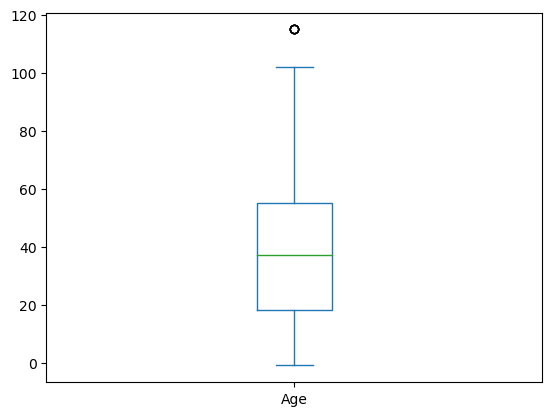

In [152]:
base_data.Age.plot(kind="box")
base_data.Age.quantile([1,0.99,0.75,0.50,0.25,0])

#### As seen from the above box plot there are some outliers in our data set.
After checking for quartiles we can see that there is one patient whose age is -1 and after inspecting more it is found that there are 4 patients whose age is 115.
Hence, dropping these rows is the best option as the number of outliers is very less.


In [153]:
base_data = base_data[~((base_data.Age == -1) | (base_data.Age == 115))]

1.00    102.0
0.99     86.0
0.75     55.0
0.50     37.0
0.25     18.0
0.00      0.0
Name: Age, dtype: float64

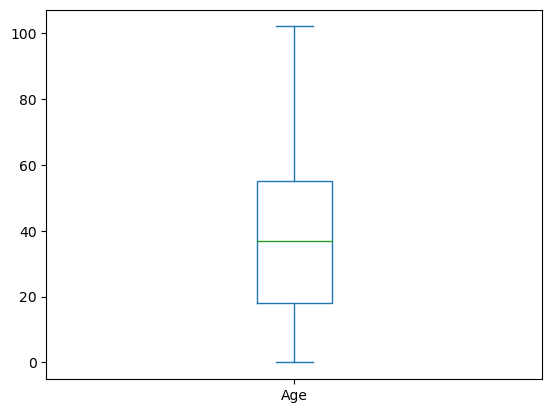

In [154]:
base_data.Age.plot(kind="box")
base_data.Age.quantile([1,0.99,0.75,0.50,0.25,0])

In [155]:
base_data[base_data.Age == 0].shape

(3539, 14)

* The assumption that patients with 0 age as toodlers can be considered appropriate, as they received no scholarships and are not suffering from any diseases.
* There are 3539 toddler appointments in the data. 

##### Now We can Start performing the Analysis

## Exploratory Data Analysis

<Figure size 900x600 with 0 Axes>

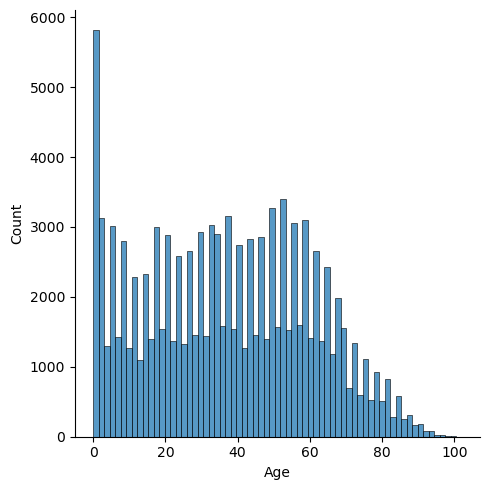

In [156]:
plt.figure(figsize=(9,6))
sns.displot(base_data['Age']) # plotting distribution of age variable   
plt.show()

##### From here also we can see that most of the patients are toddlers.


In [157]:
base_data.Age.describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

### Creating a new column "Age Category" for better understanding the age distribution.

In [158]:
def age_category(col):
    if (col >= 0) & (col <=14):
        return 'Children'
    elif (col >= 15) & (col <=24):
        return 'Youth'
    elif (col >= 25) & (col <=64):
        return 'Adults'
    else:
        return 'Senior'

base_data['Age Category'] = base_data['Age'].apply(age_category)
print(base_data['Age Category'].value_counts(normalize = True))

Adults      0.532541
Children    0.210431
Senior      0.130265
Youth       0.126763
Name: Age Category, dtype: float64


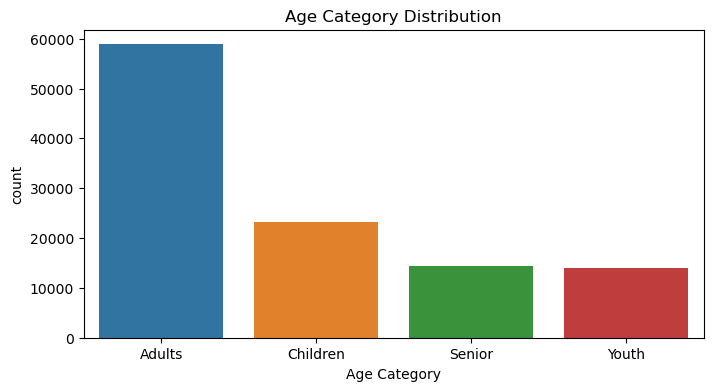

In [159]:
plt.figure(figsize=(8,4))
sns.countplot(base_data,x=base_data['Age Category'])
plt.title('Age Category Distribution')
plt.show()

53% of the patients in the data are Adults, 21% of children,13% of Seniors and 12% of Youth.



### Unique PatientIds and AppointmentIds



In [160]:
unique_patienids = base_data['PatientId'].nunique()
unique_appointmentids = base_data['AppointmentID'].nunique()
recurring_patients = (unique_appointmentids - unique_patienids)/unique_appointmentids * 100

print('Unique PatientIds : ' + str(unique_patienids))
print('Unique AppointmentIds : ' + str(unique_appointmentids))
print('% of recurring patients: '+ str(recurring_patients))

Unique PatientIds : 62296
Unique AppointmentIds : 110521
% of recurring patients: 43.63424145637481


There are only 62299 unique patient ids while the number of unique appointment ids are 110527. This shows that 43% of the appointments are made by the recurring patients.

## Distribution of Gender 

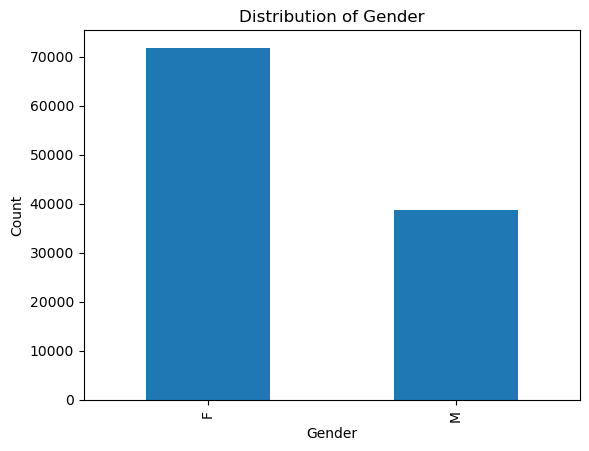

In [161]:
base_data.Gender.value_counts().plot.bar()
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are 110527 appointments in total. 65% of the appointments are reserved by Female and 35% are reserved by Male. This indicates that the probability of ill health is distributed disproportionately among the Male and Female.

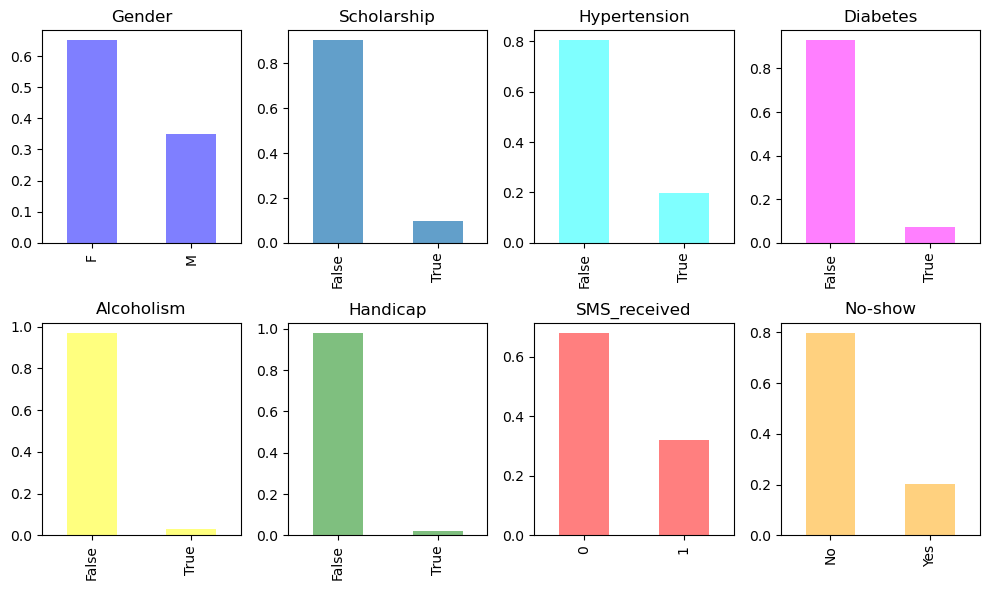

In [162]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
base_data['Gender'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='blue')
plt.title('Gender')

plt.subplot(2,4,2)
base_data['Scholarship'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.7)
plt.title('Scholarship')

plt.subplot(2,4,3)
base_data['Hypertension'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Hypertension')

plt.subplot(2,4,4)
base_data['Diabetes'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='magenta')
plt.title('Diabetes')

plt.subplot(2,4,5)
base_data['Alcoholism'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.subplot(2,4,6)
base_data['Handicap'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='green')
plt.title('Handicap')


plt.subplot(2,4,7)
base_data['SMS_received'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='red')
plt.title('SMS_received')

plt.subplot(2,4,8)
base_data['No-show'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='orange')
plt.title('No-show')

plt.tight_layout()
plt.show()

* Scholarship : 85% of people who reserved appointments have no scholarship.
* Hypertension, Alcoholism & Diabetes : 20% of the people are suffering from Hypertension. Less than 10% of people are suffering from Diabetes and Alcoholism.
* SMS_received : Approximately 70% of the people did not receive any SMS alerts about the appointments.
* No-Show: Only 20% of the appointments made turned out to be a no-show.

### Extracting Day of the Week for AppointmentDay

Wednesday    0.234046
Tuesday      0.231992
Monday       0.205499
Friday       0.172076
Thursday     0.156034
Saturday     0.000353
Name: Appointment_WeekDay, dtype: float64


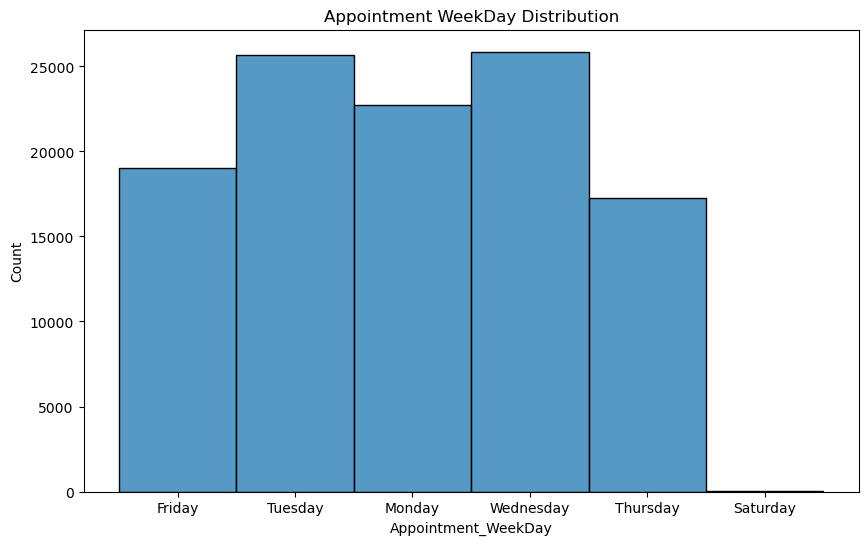

In [163]:
base_data['Appointment_WeekDay'] = base_data['AppointmentDay'].dt.day_name()
print(base_data['Appointment_WeekDay'].value_counts(normalize = True))
plt.figure(figsize=(10,6))
sns.histplot(base_data['Appointment_WeekDay'])
plt.title('Appointment WeekDay Distribution')
plt.show()

* The above visual shows that 46% of the appointments are reserved on Tuesday and Wednesday.
* The next favourable days for the appointments as observed above are MOnday, Friday and Thursday.
* The least number of appointments are observed during Saturday, which is obvious as it is a weekend day.

### Extracting Day of the Week for ScheduleDay



Tuesday      0.236769
Wednesday    0.219524
Monday       0.208838
Friday       0.171135
Thursday     0.163516
Saturday     0.000217
Name: Scheduled_WeekDay, dtype: float64


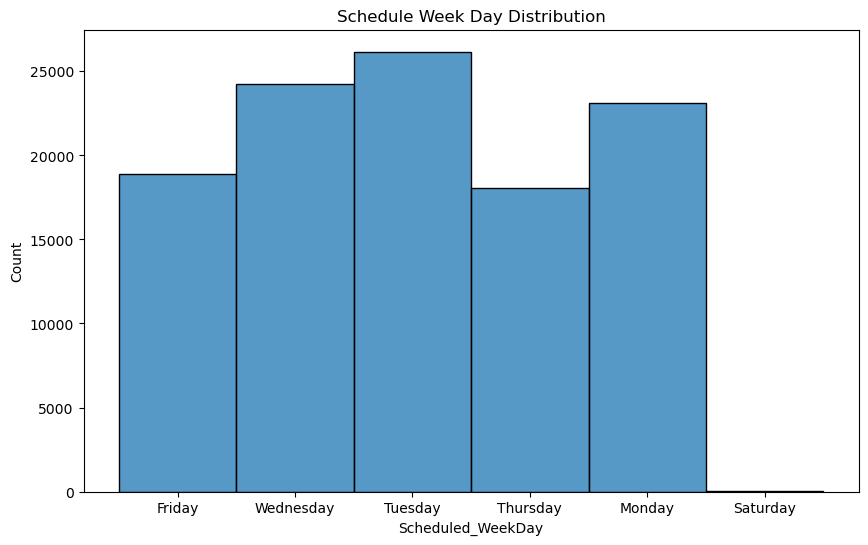

In [164]:
base_data['Scheduled_WeekDay'] = base_data['ScheduledDay'].dt.day_name()

print(base_data['Scheduled_WeekDay'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.histplot(base_data['Scheduled_WeekDay'])
plt.title('Schedule Week Day Distribution')
plt.show()

Similar kind of trend is followed in Scheduled day as seen in Appointmet Day. Highest number of appointments are scheduled on Tuedsays followed by Wednesdays and Mondays.

## Bi-variate Analysis

### Age Category Vs No-Show

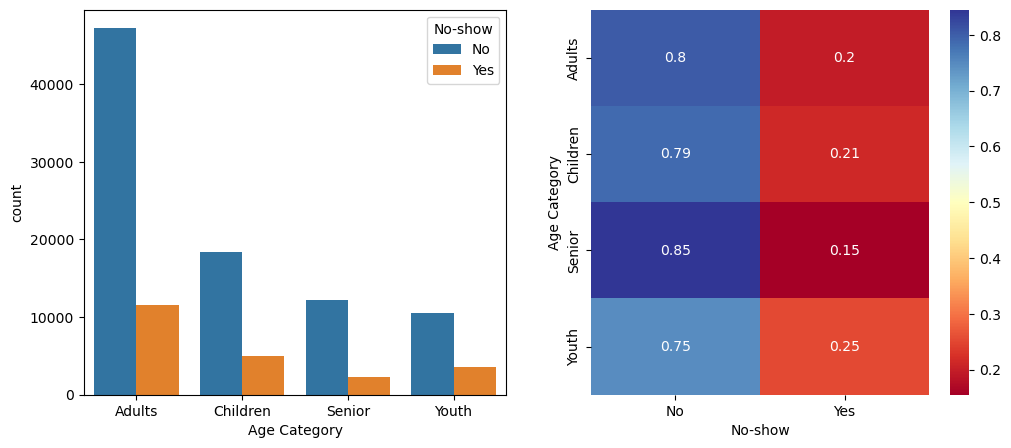

In [165]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(base_data,x='Age Category',hue = base_data['No-show'])

plt.subplot(122)
sns.heatmap(pd.crosstab(base_data['Age Category'], base_data['No-show'],normalize='index'),cmap="RdYlBu", annot=True)
plt.show()

On observing the bar plot, we may infer that the highest number of No-shows are observed in Adults. But the percentage values on the left gives a clear idea of the situation. Out of 100 appointments booked by the Youth, 25 of them turn out to be NO-shows which is the highest in the age categories. Seniors are among the age group with less percentage of No-shows. This proves that Age can be an important factor in determining the probability of a patient showing/not showing up for his/her appointment.

### (Hypertension, Diabetes, Alcoholism) Vs No-show

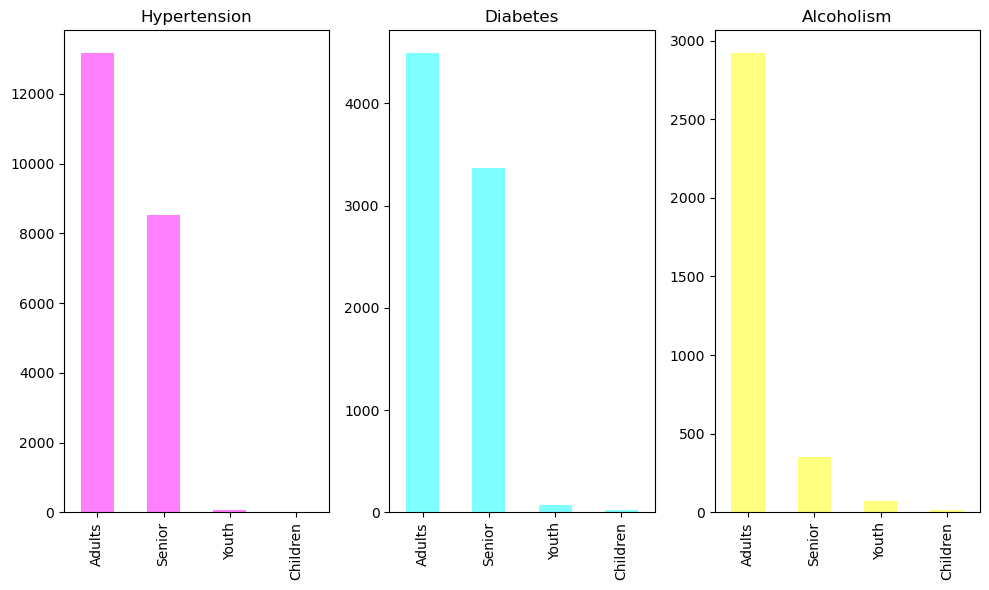

In [166]:
plt.figure(figsize=(10,6))

plt.subplot(131)
df_Hipertension = base_data[base_data['Hypertension'] == 1]
df_Hipertension['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='magenta')
plt.title('Hypertension')

plt.subplot(132)
df_Diabetes = base_data[base_data['Diabetes'] == 1]
df_Diabetes['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Diabetes')

plt.subplot(133)
df_Alcoholism = base_data[base_data['Alcoholism'] == 1]
df_Alcoholism['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.tight_layout()
plt.show()

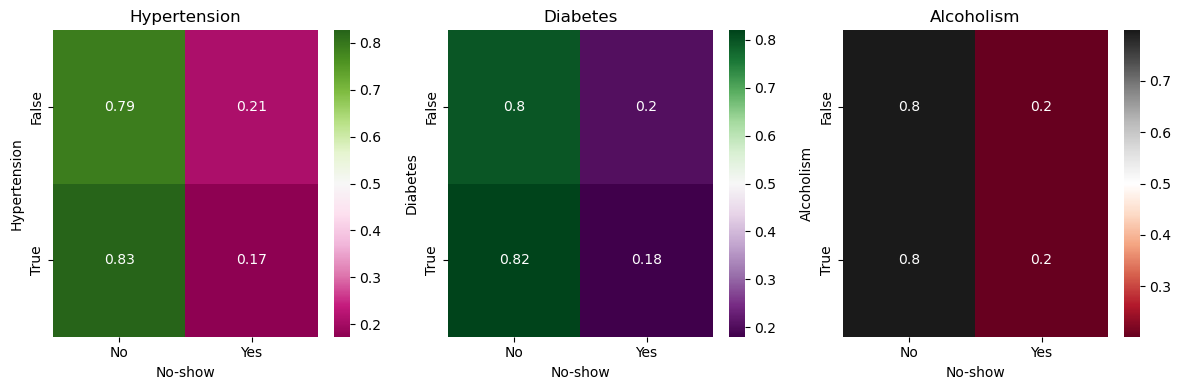

In [167]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.heatmap(pd.crosstab(base_data['Hypertension'], base_data['No-show'],normalize='index'),cmap="PiYG", annot=True)
plt.title('Hypertension')

plt.subplot(132)
sns.heatmap(pd.crosstab(base_data['Diabetes'], base_data['No-show'],normalize='index'),cmap="PRGn", annot=True)
plt.title('Diabetes')

plt.subplot(133)
sns.heatmap(pd.crosstab(base_data['Alcoholism'], base_data['No-show'],normalize='index'),cmap="RdGy", annot=True)
plt.title('Alcoholism')

plt.tight_layout()
plt.show()